# Chapter 6. Probability

*E*에 대한 확률

In [3]:
%%latex
$$P(E)$$

<IPython.core.display.Latex object>

## Dependence and Independence

두 사건: $E$, $F$
* 종속성 - $E$의 발생 여부가 $F$의 발생 여부에 대한 **정보를 제공한다면** ($F$, $E$로 바꿔도 성립)
  
* 독립성 - ... 그렇지 않다면(**정보를 제공하지 않는다면**)

수학적으로, 독립적; 두 사건이 발생할 확률 == 각 사건이 발생할 확률의 곱

In [4]:
%%latex
$$P(E, F) = P(E)P(F)$$

<IPython.core.display.Latex object>

## Conditional Probability

The probability of $E$ "conditional on $F$"; 반드시 독립적이란 보장이 없다면(not necessarily independent = **종속적이면**) + $F$의 확률이 0이 아니라면

In [5]:
%%latex
$$P(E|F) = P(E, F)/P(F)$$

<IPython.core.display.Latex object>

In [6]:
%%latex
$$P(E, F) = P(E|F)P(F)$$

<IPython.core.display.Latex object>

$E$, $F$가 독립적이라면

In [7]:
%%latex
$$P(E|F) = P(E)$$

<IPython.core.display.Latex object>

In [8]:
%%latex
$$P(E|F)
= P(E, F)/P(F)
= P(E)P(F)/P(F)
= P(E)$$

<IPython.core.display.Latex object>

$F$가 발생함이 $E$가 발생할지에 대한 정보를 주지 않음

Tricky Example; 두 아이의 성별
가정:
1. 딸/아들일 확률은 동일
2. 첫째와 둘째의 성별은 독립적

* "no girls" - 1/4
* "one boy, one girl" - 1/2
* "two grils" - 1/4

$G$ - 첫째가 딸 / $B$ - 둘 다 딸 ... $B$ conditional on $G$?

In [9]:
%%latex
$$P(B|G)
= P(B, G)/P(G)
= P(B)/P(G)
= 1/2$$

<IPython.core.display.Latex object>

첫째가 딸이고 둘 다 딸일 확률; $P(B, G)$ == 둘 다 딸일 확률; $P(B)$ (직관적인 결과)

$L$ - 적어도 딸 하나 ... $B$ conditional on $L$?

In [10]:
%%latex
$$P(B|L)
= P(B, L)/P(L)
= P(B)/P(L)
= 1/3$$

<IPython.core.display.Latex object>

적어도 하난 딸이고 둘 다 딸일 확률; $P(B, L)$  == 둘 다 딸일 확률; $P(B)$

In [16]:
import random

def random_kid():
    return random.choice(["boy", "girl"])

both_girls = 0
older_girl = 0
either_girl = 0

random.seed(0)
for _ in range(10000):
    younger = random_kid()
    older = random_kid()
    if older == "girl":
        older_girl += 1
    if older == "girl" and younger == "girl":
        both_girls += 1
    if older == "girl" or younger == "girl":
        either_girl += 1

print("P(B|G):", both_girls / older_girl)
print("P(B|L):", both_girls / either_girl)

P(B|G): 0.5007089325501317
P(B|L): 0.3311897106109325


## Bayes's Theroem

"reversing" conditional probability

$E$ conditional on $F$의 확률을 알고 싶은데, $P(E|F)$       
$F$ conditional on $E$의 확률만 알고 있다. $P(F|E)$ (*reversed*)

조건부확률의 정의 두 번 사용

In [12]:
%%latex
$$P(E|F) 
= P(E, F)/P(F) 
= P(F|E)P(E)/P(F)$$

<IPython.core.display.Latex object>

$P(F) = P(F, E) + P(F, \neg E)$  ... mutually exclusive

In [13]:
%%latex
$$
P(F)
= P(F, E) + P(F, \neg E)
= P(F|E)P(E) + P(F|\neg E)P(\neg E)
$$

<IPython.core.display.Latex object>

**Bayes's Theorem**

In [14]:
%%latex
$$
P(E|F)
= P(F|E)P(E)/[P(F|E)P(E)+P(F|\neg E)P(\neg E)]
$$

<IPython.core.display.Latex object>

발병률(affects in every 10,000 people) - **1/10_000**   
테스트 정확도("diseased" if you have the disease, "nondiseased" if you don't) - **99%**

*양성* 테스트 정확도("diseased" if you have the disease, ~~"nondiseased" if you don't~~) - **99%**

$T$ - 양성    
$D$ - 병에 걸림

$P(D) = 0.0001$ 발병률


$P(T|D) = 0.99$ 병에 걸렸을 때 양성일 확률 (??)


$P(T|\neg D) = 0.01$ 병에 안걸렸는데 양성일 확률 (???)


$P(\neg D) = 0.9999$ 병에 안걸렸을 확률

In [15]:
%%latex
$$
P(D|T)
= P(T|D)P(D)/[P(T|D)P(D) + P(T|\neg D)P(\neg D)]
$$

<IPython.core.display.Latex object>

In [39]:
PD = .0001
PTD = .99
PTnD = 1 - PTD
PnD = 1 - PD

### ...

In [16]:
%%latex
$$
P(T)
= P(T, D) + P(T, \neg D)
= P(T|D)P(D) + P(T|\neg D)P(\neg D)
$$

<IPython.core.display.Latex object>

In [18]:
PT = PTD*PD + PTnD*PnD
PT

0.01009800000000001

In [40]:
PDT = (PTD*PD) / (PTD*PD + PTnD*PnD)
print(f"{(PDT*100):.2f}%")
PDT

0.98%


0.009803921568627442

양성 반응을 보인 사람 중 병에 걸렸을 확률은 1%도 안된다   
(NOTE: random people)

의사는 대략 2라고 할 것이다 ?

전체: 1_000_000(1 million)    
* 병이 있을 것: 100
  + 양성: 99
* 병이 없을 것: 999_900
  + 양성: 9_999
  
양성반응 중 병에 걸린 사람 99/(99+9_999)

In [20]:
99/(99+9999)

0.00980392156862745

## Random Variable

확률 분포(probability distribution)와 관계 있는 변수   

동전:
* 앞면 - 1
* 뒷면 - 0

`range(10)`에서 나온 값

각 분포는 변수 값이 나올(realizes) 확률을 의미합니다

동전:
* 앞면 - 0.5
* 뒷면 - 0.5

`range(10)`; 각각 0.1

확률 변수의 기대 값(*expected value*); 확률 가중평균 값

동전 0.5   
`range(10)`; 4.5

조건부 확률에도 적용할 수 있습니다   

두 아이의 성별 가정:  
*X*; 딸의 수
* 0 - 1/4
* 1 - 1/2
* 2 - 1/4

*Y*; 최소 딸이 한 명일 때, 전체 딸의 수
* 1 - 2/3
* 2 - 1/3

*Z*; 첫째가 딸일 때, 전체 딸의 수
* 1 - 1/2
* 2 - 1/2

## Continuous Distributions

연속적 결과에 대한 확률, 연속 분포 

실수 결과 값만을 사용(*실생활에선 아닐 수도 있다*)

In [2]:
def uniform_pdf(x):
    return 1 if x >= 0 and x < 1 else 0

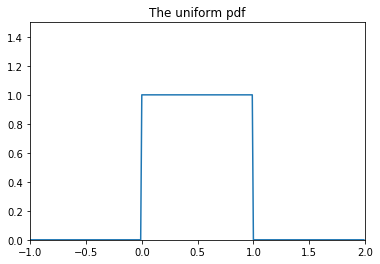

In [11]:
from matplotlib import pyplot as plt

xs = [x / 100.0 for x in range(-100, 200)]
plt.plot(xs, [uniform_pdf(x) for x in xs], '-')
plt.axis([-1, 2, 0, 1.5])
plt.title("The uniform pdf")
plt.show()

균등분포(*uniform distribution*); 0~1 같은 비중(*equal weight*)

pdf(*probability density function*, 확률밀도함수)   
**적분 값 == 확률**

In [22]:
def uniform_cdf(x):
    "returns the probability that a uniforn randon variable is <= x"
    if x < 0:   return 0 # uniform random is never less than 0
    elif x < 1: return x # e.g. P(X <= 0.4) = 0.4
    else:       return 1 # uniform random is always less than 1

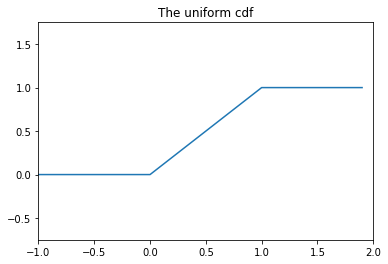

In [24]:
xs = [x / 10.0 for x in range(-10, 20)]
plt.plot(xs, [uniform_cdf(x) for x in xs], '-')
plt.axis([-1, 2, -0.75, 1.75])
plt.title("The uniform cdf")
plt.show()

## The Normal Distribution

분포왕, 종모양

모양을 결정하는 두 가지 인자; 평균과 표준편차:

- 평균(µ) - 중심의 위치
- 표준편차(σ) - 너비(클수록 넓고 작을수록 좁다)


밀도 함수

In [25]:
%%latex
$$
f(x|\mu, \sigma) = {{1}\over{\sqrt{2\pi}\sigma}}\exp({-{(x-\mu)^2}\over{2\sigma^2}})
$$

<IPython.core.display.Latex object>

In [22]:
import math

def normal_pdf(x, mu=0, sigma=1):
    sqrt_two_pi = math.sqrt(2 * math.pi)
    return (math.exp(-(x-mu) ** 2 / 2 / sigma ** 2) / (sqrt_two_pi * sigma))

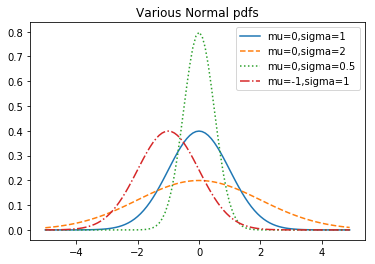

In [23]:
xs = [x / 10.0 for x in range(-50, 50)]
plt.plot(xs, [normal_pdf(x, sigma=1) for x in xs], '-', label='mu=0,sigma=1')
plt.plot(xs, [normal_pdf(x, sigma=2) for x in xs], '--', label='mu=0,sigma=2')
plt.plot(xs, [normal_pdf(x, sigma=0.5) for x in xs], ':', label='mu=0,sigma=0.5')
plt.plot(xs, [normal_pdf(x, mu=-1) for x in xs], '-.', label='mu=-1,sigma=1')
plt.legend()
plt.title("Various Normal pdfs")
plt.show()

표준정규분포(*standard normal distribution*); µ=0, σ=1

In [24]:
%%latex
$$
X = \sigma Z + \mu
$$

<IPython.core.display.Latex object>

*X*; 평균 - µ, 표준편차 - σ 정규분포 확률변수   
*Z*; 표준정규분포 확률변수

In [25]:
%%latex
$$
Z = (X-\mu)/\sigma
$$

<IPython.core.display.Latex object>

정규분포의 누적분포함수(cdf); 구현 어렵지만 (비[초등함수](https://ko.wikipedia.org/wiki/%EC%B4%88%EB%93%B1%ED%95%A8%EC%88%98)) [오차함수](https://ko.wikipedia.org/wiki/%EC%98%A4%EC%B0%A8_%ED%95%A8%EC%88%98)로 쉽게 구할 수 있습니다
(`math.erf`)   



In [26]:
def normal_cdf(x, mu=0, sigma=1):
    return (1 + math.erf((x - mu) / math.sqrt(2) / sigma)) / 2

In [27]:
%%latex
$$
\DeclareMathOperator\erf{erf}

\Phi(x)
= {1\over2}\big[1 + \erf\big({{(x - \mu)}\over{\sqrt2 \sigma}}\big)\big]
$$

<IPython.core.display.Latex object>

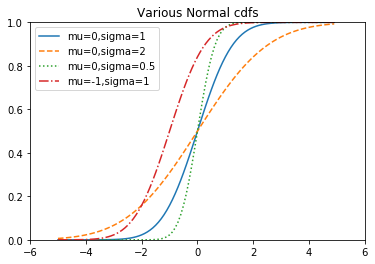

In [28]:
xs = [x / 10.0 for x in range(-50, 50)]
plt.plot(xs, [normal_cdf(x, sigma=1) for x in xs], '-', label='mu=0,sigma=1')
plt.plot(xs, [normal_cdf(x, sigma=2) for x in xs], '--', label='mu=0,sigma=2')
plt.plot(xs, [normal_cdf(x, sigma=0.5) for x in xs], ':', label='mu=0,sigma=0.5')
plt.plot(xs, [normal_cdf(x, mu=-1) for x in xs], '-.', label='mu=-1,sigma=1')
plt.legend()
plt.axis([-6, 6, 0, 1])
plt.title("Various Normal cdfs")
plt.show()

특정 확률의 확률변수를 구하기 위해 `normal_cdf`의 역함수를 구해야한다.   
역함수를 구하는건 어렵지만, `normal_cdf` 연속 증가임(정렬되어 있다) - 이진 탐색을 사용한다.   

In [41]:
def inverse_normal_cdf(p, mu=0, sigma=1, tolerance=0.00001):
    """find approximate inverse using binary search"""
    
    # if not standard, compute standard and rescale
    if mu != 0 or sigma != 1:
        return mu + sigma * inverse_normal_cdf(p, tolerance=tolerance)
    
    low_z, low_p = -10.0, 0         # normal_cdf(-10) is (very close to) 0
    hi_z, hi_p   =  10.0, 1         # normal_cdf(10) is (very close to) 1
    while hi_z - low_z > tolerance:
        mid_z = (low_z + hi_z) / 2  # consider the midpoint
        mid_p = normal_cdf(mid_z)   # and the cdf's value there
        if mid_p < p:
            # midpoint is still too slow, search above it
            low_z, low_p = mid_z, mid_p
        elif mid_p > p:
            # midpoint is still too high, search below it
            hi_z, hi_p = mid_z, mid_p
        else:
            break
            
    return mid_z

## The Central Limit Theroem

정규분포를 유용한 이유   
(동일한 분포에 대한 독립적인 확률변수의 평균)확률변수가 대략적으로 정규분포를 따른다(approximate).    
> a random variable defined as the average of a large number of independent and identically distributed random variables is itself approximately normally distributed.

**이항분포(이항확률변수)는 정규분포로 근사(approximate)한다.**

확률변수; $x_1, ..., x_n$, 평균 - $\mu$, 표준편차 - $\sigma$   
그리고 $n$이 충분히 크다면

In [30]:
%%latex
$$
{1\over n}(x_1 + ... + x_n)
$$

<IPython.core.display.Latex object>

평균 $\mu$, 표준편차 $\sigma/\sqrt n$ 인 정규분포와 *비슷*

In [31]:
%%latex
$$
(x_1 + ... + x_n)-\mu n\over\sigma\sqrt n
$$

<IPython.core.display.Latex object>

평균 0, 표준편차 1 인 정규분포와 *비슷*

이항 확률변수(*binomial random variable*)   
두 개의 인자; $n$과 $p$    
Binomial(n, p) == n개의 독립적인 [Bernoulli(p)](https://ko.wikipedia.org/wiki/%EB%B2%A0%EB%A5%B4%EB%88%84%EC%9D%B4_%EC%8B%9C%ED%96%89)의 합

베르누이 확률변수(Bermoulli random variable):
* $p$ - 1
* $1-p$ - 0

In [32]:
def bernoulli_trial(p):
    return 1 if random.random() < p else 0

def binomial(n, p):
    return sum(bernoulli_trial(p) for _ in range(n))

Bernoulli(p); 평균 $p$, 표준편차 $\sqrt{p(1-p)}$

중심극한정리에 따르면; $n$이 적당히 크다면   
Binomial(n, p); 평균 $np$, 표준편차 $\sqrt{np(1-p)}$

In [33]:
from collections import Counter

def make_hist(p, n, num_points):
    data = [binomial(n, p) for _ in range(num_points)]
    
    # use a bar chart to show the actial bionomial samples
    histogram = Counter(data)
    plt.bar([x for x in histogram.keys()],
            [v / num_points for v in histogram.values()],
            0.8,
            color='0.75')
    
    mu = p * n
    sigma = math.sqrt(n * p * (1 - p))
    
    # use a line chart to show the normal approximation
    xs = range(min(data), max(data) + 1)
    ys = [normal_cdf(i + 0.5, mu, sigma) - normal_cdf(i - 0.5, mu, sigma)\
          for i in xs]
    plt.plot(xs, ys)
    plt.title("Binomial Distribution vs. Normal Approximation")
    plt.show()

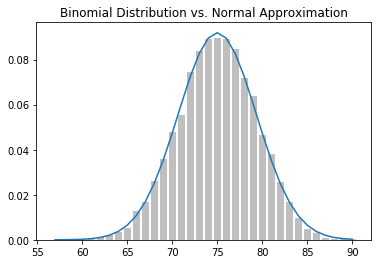

In [35]:
make_hist(0.75, 100, 10000)

동전을 100번 던져, 60번 이상이 앞면 나오는 확률

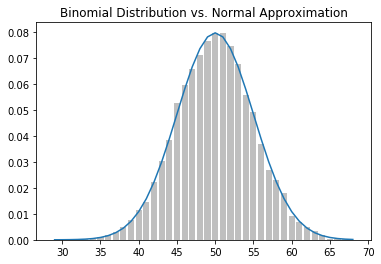

In [36]:
make_hist(0.5, 100, 10000)